<a href="https://colab.research.google.com/github/ramsoi53/ramsoi/blob/main/ML_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/files')

In [2]:
!pwd

/content/drive/MyDrive/Colab Notebooks/files


# Project Practice - Kaggle's Titanic competition
Detailed Time Schedule

*   Import files and check files - 2022.04.04 
*   Check nulls and deal with them - 2022.04.04
*   Data Preprocessing
    - Set up the logic
    - Visulaization
    - Check Outliners and deal with it  - 2022.04.04








In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


In [4]:
# Import and read files

train_df = pd.read_csv('ttn_train.csv')
test_df = pd.read_csv('tn_test.csv')

In [5]:
# shape of each data

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Let's see how each data looks like
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Age and Sex:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

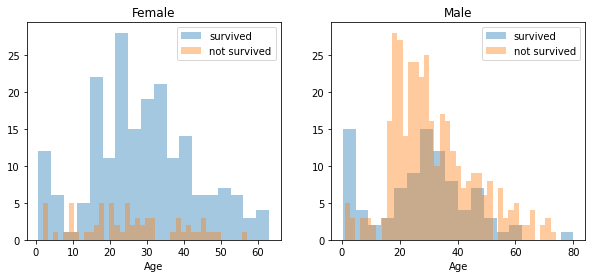

In [7]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women = train_df[train_df['Sex'] == 'female']
men = train_df[train_df['Sex'] == 'male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(),ax=axes[1], bins=18, label=survived, kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False)
ax.legend()
ax.set_title('Male')


# Embarked, Pclass and Sex

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


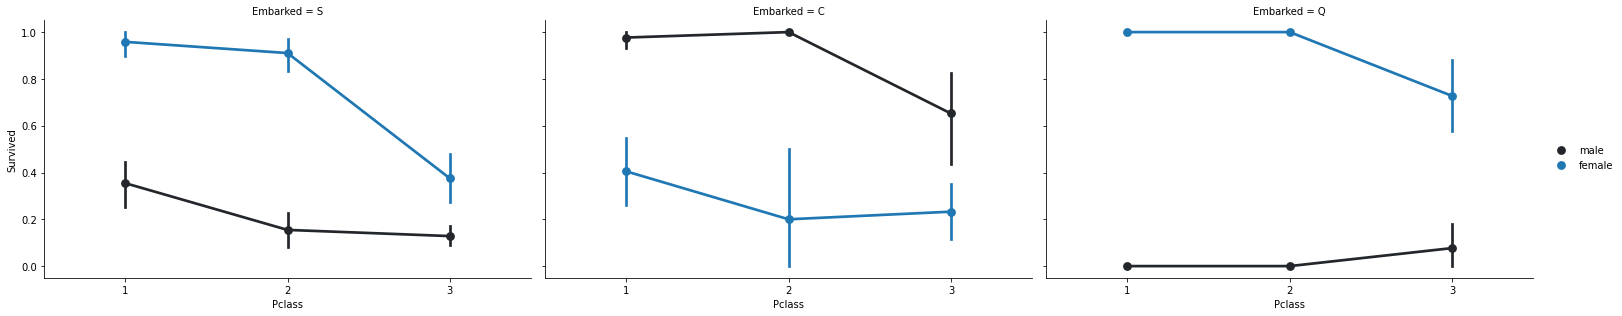

In [8]:
FacetGrid = sns.FacetGrid(train_df, col='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

# Pclass

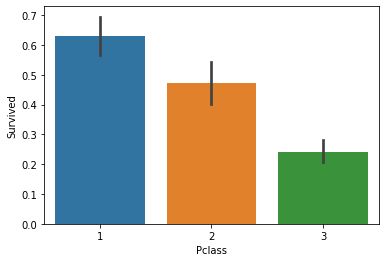

In [9]:
sns.barplot(x= 'Pclass', y= 'Survived', data=train_df)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


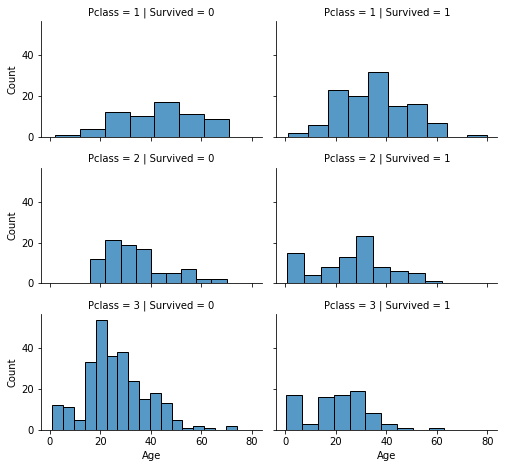

In [10]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(sns.histplot, 'Age')
grid.add_legend()

## SibSp and Parch


In [12]:
data = [train_df, test_df]
for dataset in data:
  dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
  dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
  dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
  dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()



1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


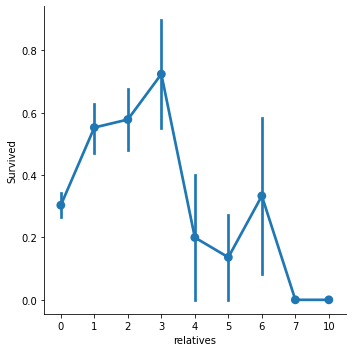

In [13]:
axes = sns.factorplot('relatives', 'Survived', data=train_df)


# Data Preprocessing

In [14]:
train_df = train_df.drop(['PassengerId'], axis=1)


# Missing Data

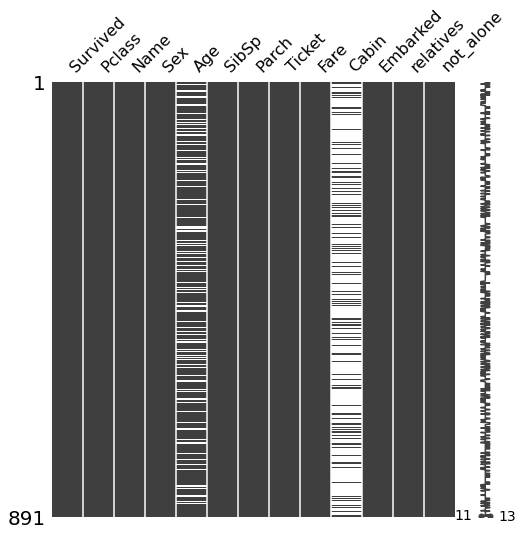

In [15]:
import missingno as msno
msno.matrix(df=train_df, figsize=(8,8))



# Cabin

In [30]:
import re
deck = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "U":8}
data=[train_df, test_df]

for dataset in data:
  dataset['Cabin'] = dataset['Cabin'].fillna("U0")
  dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
  dataset['Deck'] = dataset['Deck'].map(deck)
  dataset['Deck']=dataset['Deck'].fillna(0)
  dataset['Deck'] = dataset['Deck'].astype(int)

train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)


# Cabin 좀 더 공부하려면 아래 참조
https://www.kaggle.com/code/ccastleberry/titanic-cabin-features/notebook

# Age 이해가 잘 안간다

In [31]:
data = [train_df, test_df]

for dataset in data:
  mean = train_df['Age'].mean()
  std = train_df['Age'].std()
  is_null = dataset['Age'].isnull().sum()
   #compute random numbers between the mean, std and is_null
  rand_age = np.random.randint(mean-std, mean+std, size=is_null)

  age_slice = dataset['Age'].copy()
  age_slice[np.isnan(age_slice)] = rand_age
  dataset['Age'] = age_slice
  dataset['Age'] = train_df['Age'].astype(int)


train_df['Age'].isnull().sum()

                                

0

# Embarked

In [32]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [35]:
data = [train_df, test_df]
common_value = 'S'

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

train_df.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     0
relatives    0
not_alone    0
Deck         0
dtype: int64

# Converting Features

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


# Fare

In [37]:
data= [train_df, test_df]
for dataset in data:
  dataset['Fare'] = dataset['Fare'].fillna(0)
  dataset['Fare'] = dataset['Fare'].astype(int)



# Name 모르는 코드가 너무 많다
We will use the feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [ ]:
train_df['Name'].unique()

In [40]:
data = [train_df, test_df]
titles = {"Mr":1,"Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 

for dataset in data:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

  dataset['Title'] = dataset['Title'].map(titles)
  dataset['Title'] = dataset['Title'].fillna(0) #  filling NaN with 0, to get safe


train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)


# SEX

In [58]:
data = [train_df, test_df]
genders = {"male":0, "female": 1}
for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(genders)

# Ticket

In [45]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [46]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

# Embarked



In [47]:
data=[train_df, test_df]
ports={"S":0, "C":1, "Q":2}

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].map(ports)

# Creating Categories

In [48]:
data = [train_df, test_df]

for dataset in data:
  dataset['Age'] = dataset['Age'].astype(int)
  dataset.loc[dataset['Age'] <=11, 'Age'] = 0
  dataset.loc[(dataset['Age']>11) & (dataset['Age']<=18), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
  dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
  dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
  dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
  dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [49]:
train_df['Age'].value_counts()

4    168
6    167
3    147
5    140
2    113
1     88
0     68
Name: Age, dtype: int64

## Fare

In [59]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,NaN,2,1,0,7,0,1,0,8,1
1,1,1,NaN,5,1,0,71,1,1,0,3,3
2,1,3,NaN,3,0,0,7,0,0,1,8,2
3,1,1,NaN,5,1,0,53,0,1,0,3,3
4,0,3,NaN,5,0,0,8,0,0,1,8,1


# Feature Engineering
1. Outliner 제거 :  Fare등(done)
2. 결측지 핸들링 (done)
- Age 결측치 : 177명이나 비는데.. 이건 pclass를 뽑고, 각 class별 나이 평균을 넣어주자. 
3. 인코딩 : Sex, Age group화
4. 데이터 ㅁ
3. Things to do
인코딩 : Sex,이제까지 정리
4. 여성의 생존률이 더 높다. -> 인코딩 필요
5. Class 별로 생존률이 다르다. 1등석이 가장 높다 -> 활용 ㅇㅋ
6. 어릴수록 / 여성일수록 생존률이 높다. -> 나이는 변수가 너무 많으니 그룹화 해야함. (5살단위로 끊고, 인코딩)
7. Parch는 
해야할 것:
8. sib / children 분석
: 아마 female with mean of children whose parents are survived -> feature engineering
: 
: fare에서 outliner 제거해줘야함
: Parch는 남자는 2 vs 2+로 그룹화 , 여자는 3 vs 3+그룹화 하자.
: Embarked # 결측치가 없으면 그대로 쓰면 되겠다. (done)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


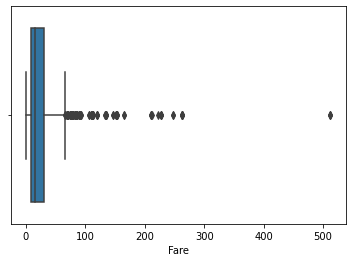

In [31]:
from pandas.core.algorithms import quantile
#Outlier detection
sns.boxplot(df_train['Fare'],data=df_train)






In [32]:
df_test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [33]:
# Train Outlier 제거
Q1 = df_train['Fare'].quantile(0.25)
Q3 = df_train['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df_train['Fare']=np.where(df_train['Fare']>upper_whisker,upper_whisker,np.where(df_train['Fare']<lower_whisker,lower_whisker,df_train['Fare']))

# Test Outlier 제거

Q1 = df_test['Fare'].quantile(0.25)
Q3 = df_test['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df_test['Fare']=np.where(df_test['Fare']>upper_whisker,upper_whisker,np.where(df_test['Fare']<lower_whisker,lower_whisker,df_test['Fare']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


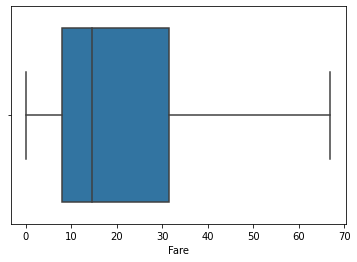

In [34]:
# sns.boxplot(df_train['Fare'], data=df_train)
sns.boxplot(df_test['Fare'], data=df_test)

In [35]:
df_train['Fare'].describe()

count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64

In [36]:
#결측치 핸들링. AGE..
#1. Cabin : 날리기
#2. Age : Class별 평균나이로 집어 넣기
#3. Embarked : 걍 알아서 아무거나 넣기

df_train.drop(columns=['Cabin'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)

In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 29.4+ KB


In [38]:
#Pclass별 성별 나이 평균을 구하고 이를 결측값이 자동으로 집어넣는 함수.

df_train['Age']=df_train.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
df_test['Age']=df_test.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [39]:
df_train['Age'].value_counts()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 101.9+ KB


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 29.4+ KB


In [41]:
#Embark 결측값은 가장 많이 나온것 넣어보자
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [43]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Feature Engineering
2. 어릴수록 / 여성일수록 생존률이 높다. -> 나이는 변수가 너무 많으니 그룹화 해야함. (5살단위로 끊고, 인코딩) (done)
3. Parch는 그룹화 한 나이에 M+F 붙여서 Sex_Parch0 1 2 3 4 5 6 7 8같이 컬럼을 신규로 만들고 Sex, Parch Drop 하자.   혹은 family size를 구하자. Parch+Sibling이 FAMILY SIZE이니. (done-> family size로)
해야할 것:

# Modeling
1. 인코딩 : Sex, Age group화

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 101.9+ KB


In [45]:
 df_train['Age'] = df_train['Age'].astype(int)

In [46]:
df_train.loc[df_train['Age'] <=11,'Age'] = 0
df_train.loc[(df_train['Age'] > 11) & (df_train['Age'] <= 18), 'Age'] = 1
df_train.loc[(df_train['Age'] > 18) & (df_train['Age'] <= 22), 'Age'] = 2
df_train.loc[(df_train['Age'] > 22) & (df_train['Age'] <= 27), 'Age'] = 3
df_train.loc[(df_train['Age'] > 27) & (df_train['Age'] <= 33), 'Age'] = 4
df_train.loc[(df_train['Age'] > 33) & (df_train['Age'] <= 40), 'Age'] = 5
df_train.loc[(df_train['Age'] > 40) & (df_train['Age'] <= 66), 'Age'] = 6
df_train.loc[ df_train['Age'] > 66, 'Age'] = 6

df_train['Age'].value_counts()


3    200
6    169
4    137
2    134
5    112
1     71
0     68
Name: Age, dtype: int64

In [47]:
df_test['Age'] = df_test['Age'].astype(int)
df_test.loc[df_test['Age'] <=11,'Age'] = 0
df_test.loc[(df_test['Age'] > 11) & (df_test['Age'] <= 18), 'Age'] = 1
df_test.loc[(df_test['Age'] > 18) & (df_test['Age'] <= 22), 'Age'] = 2
df_test.loc[(df_test['Age'] > 22) & (df_test['Age'] <= 27), 'Age'] = 3
df_test.loc[(df_test['Age'] > 27) & (df_test['Age'] <= 33), 'Age'] = 4
df_test.loc[(df_test['Age'] > 33) & (df_test['Age'] <= 40), 'Age'] = 5
df_test.loc[(df_test['Age'] > 40) & (df_test['Age'] <= 66), 'Age'] = 6
df_test.loc[ df_test['Age'] > 66, 'Age'] = 6

df_test['Age'].value_counts()


3    137
6     78
4     57
2     46
5     43
1     34
0     23
Name: Age, dtype: int64

In [48]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
892,3,male,5,0,0,330911,7.8292,Q
893,3,female,6,1,0,363272,7.0000,S
894,2,male,6,0,0,240276,9.6875,Q
895,3,male,3,0,0,315154,8.6625,S
896,3,female,2,1,1,3101298,12.2875,S


In [49]:
#Family size 만들기

df_train['Family'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

df_test['Family'] = df_test['SibSp'] + df_test['Parch']
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
PassengerId,,,,,,,,,
892,3,male,5,0,0,330911,7.8292,Q,0
893,3,female,6,1,0,363272,7.0000,S,1
894,2,male,6,0,0,240276,9.6875,Q,0
895,3,male,3,0,0,315154,8.6625,S,0
896,3,female,2,1,1,3101298,12.2875,S,2


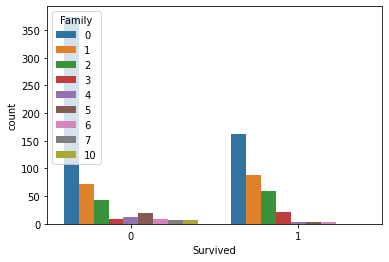

In [50]:
sns.countplot(x='Survived', data=df_train, hue='Family')

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
 9   Family    891 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 108.9+ KB


#할거 
1.sex, embarked 인코딩
2. sibsp, parch, ticket, fare drop시키기
3. test, train data 와꾸 일치시키기
4. 모델링

In [52]:
df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    int64  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
 8   Family    418 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 32.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-

In [53]:
#Sex 인코딩

df_train['Sex'].replace({'male': 1, 'female':0}, inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
PassengerId,,,,,,,,,,
1,0,3,1,2,1,0,A/5 21171,7.2500,S,1
2,1,1,0,5,1,0,PC 17599,65.6344,C,1
3,1,3,0,3,0,0,STON/O2. 3101282,7.9250,S,0
4,1,1,0,5,1,0,113803,53.1000,S,1
5,0,3,1,5,0,0,373450,8.0500,S,0


In [54]:
df_test['Sex'].replace({'male': 1, 'female':0}, inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
PassengerId,,,,,,,,,
892,3,1,5,0,0,330911,7.8292,Q,0
893,3,0,6,1,0,363272,7.0000,S,1
894,2,1,6,0,0,240276,9.6875,Q,0
895,3,1,3,0,0,315154,8.6625,S,0
896,3,0,2,1,1,3101298,12.2875,S,2


In [55]:
#Embarked 인코딩
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
 9   Family    891 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 108.9+ KB


In [56]:
df_train['Embarked'].replace({'S':1, 'C':2, 'Q':3}, inplace=True)

In [57]:
df_test['Embarked'].replace({'S':1, 'C':2, 'Q':3}, inplace=True)

In [58]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
PassengerId,,,,,,,,,
892,3,1,5,0,0,330911,7.8292,3,0
893,3,0,6,1,0,363272,7.0000,1,1
894,2,1,6,0,0,240276,9.6875,3,0
895,3,1,3,0,0,315154,8.6625,1,0
896,3,0,2,1,1,3101298,12.2875,1,2


In [59]:
#drop ticket

df_train.drop(columns='Ticket', inplace=True)

In [60]:
#passenger id drop
df_train.reset_index(drop=True, inplace=True)
df_train.drop


<bound method DataFrame.drop of      Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  Family
0           0       3    1    2      1      0   7.2500         1       1
1           1       1    0    5      1      0  65.6344         2       1
2           1       3    0    3      0      0   7.9250         1       0
3           1       1    0    5      1      0  53.1000         1       1
4           0       3    1    5      0      0   8.0500         1       0
..        ...     ...  ...  ...    ...    ...      ...       ...     ...
886         0       2    1    3      0      0  13.0000         1       0
887         1       1    0    2      0      0  30.0000         1       0
888         0       3    0    2      1      2  23.4500         1       3
889         1       1    1    3      0      0  30.0000         2       0
890         0       3    1    4      0      0   7.7500         3       0

[891 rows x 9 columns]>

In [61]:
df_test.drop(columns='Ticket', inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Family    891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB


# **Test 데이터도 똑같이 맞추자. train이랑** done



In [63]:
#Train, Test 데이터 분리
X = df_train.drop(['Survived'], axis=1)
y= df_train['Survived']

# Modeling! 평가지표 : accuracy 일단 RF만 써보자

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Family    891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2, shuffle=True, random_state=0)
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_valid)
accuracy = round(rf.score(X_valid, y_valid) * 100, 2)
print("Accuracy : ", accuracy, "%")



Accuracy :  83.24 %


In [70]:
# K-FOLD로 도전해보자
from sklearn.model_selection import KFold
kf=KFold(n_splits=5, shuffle=True, random_state=0)
test_preds = []
for num, (train_idx, valid_idx) in enumerate(kf.split(df_train.index)):
  print(f' == Fold {num} ===')
  X_train = X.iloc[train_idx]; y_train=y.iloc[train_idx]
  X_valid = X.iloc[valid_idx]; y_valid = y.iloc[valid_idx]

  rf.fit(X_train, y_train)
  pred = rf.predict(X_valid)
  test_preds.append(pred)

  accuracy = round(rf.score(X_valid, y_valid) * 100, 2)

  print('WtValidation Score:', accuracy)
  



 == Fold 0 ===
WtValidation Score: 82.12
 == Fold 1 ===
WtValidation Score: 77.53
 == Fold 2 ===
WtValidation Score: 82.02
 == Fold 3 ===
WtValidation Score: 80.9
 == Fold 4 ===
WtValidation Score: 78.09


# 현 상황 문제점
x y test, x y valid 등을 정확히 어디에 어떻게 적용하는지 너무 헷갈린다. 

이걸 명확하게 하고 넘어가야한다.



In [66]:
submission = pd.DataFrame
